The data we will be working with in this project comes from: https://sbcb.inf.ufrgs.br/cumida.
As the Structural Bioinformatics and Computational Biology Lab puts it, they have created a Curated Microarray Database (CuMiDa) for the analysis of gene expression in cancerous breast tissue.

A microarray is a very useful tool in determining which genes are activated or repressed when certain types of cancers are present. We start with a chip containing genes at known locations on the chip. When a microarray is done, samples of cancerous and healty tissues are taken and the DNA is isolated. Then the mRNA is extracted and red (cancerous) or green (healthy) cDNA is created. These are then mixed and places on the chip. Green and red cDNA binds to the chip if the complementary DNA is present on the chip. This chip is put into a scanner and then each spot (each gene) is assigned a numerical value depending on the color present on that spot. 

Note: Originally, I did this project using a SQL database, but I later decided that, since there are is so much data, with so many columns that have column titles that hold no meaning (at least to me), that this should just be done with dataframe manipulation. Dataframes can handle a lot more data and thanks to vectorized operations, dataframes are easy to manipulate and directly see what the effect of that manipulation is. If the data were structure differently, then it might make more sense to use a SQL database. Also, there are no secondary tables

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
# Load your data frame (replace 'df' with your actual data frame)
df = pd.read_csv('Breast_GSE45827.csv').drop("samples", axis=1)
df

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [202]:
def average_columns_by_type(table_name):
    return table_name.groupby(['type']).mean()
    
grouped = average_columns_by_type(df).reset_index()
grouped

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,HER,10.390339,7.665946,6.209118,7.282768,3.220987,7.093613,5.376958,4.695372,7.865080,...,12.227238,11.706451,13.797838,13.513688,6.881973,5.229737,5.474393,2.892191,3.600173,3.167852
1,basal,10.030862,8.016134,6.517833,7.277322,3.195922,7.178895,5.188827,4.724066,8.450465,...,12.241321,11.700176,13.804383,13.532135,6.896607,5.203655,5.455047,2.889398,3.604728,3.135976
2,cell_line,9.904857,8.808437,5.286330,7.584341,3.239354,6.533271,5.176932,5.055129,6.057817,...,11.966830,11.342226,13.974987,13.708715,8.038253,6.453257,6.883349,3.049190,3.843252,3.265455
3,luminal_A,10.517195,6.955149,6.175663,7.324082,3.112149,7.635086,5.297036,4.745397,7.534794,...,12.509749,11.981518,14.236411,14.013724,8.243544,6.343402,6.975552,2.903851,3.576179,3.182598
4,luminal_B,10.766478,7.458639,6.488550,7.322810,3.148384,7.562368,5.446472,4.561497,7.896553,...,12.486872,11.949901,14.228569,14.026176,8.157391,5.956942,6.701986,2.944812,3.641793,3.176325
5,normal,10.219646,6.428852,5.527662,7.587111,3.322261,8.135556,5.758591,4.578178,7.615436,...,13.237785,12.811179,14.495650,14.342022,9.338737,5.328691,6.631454,2.894163,3.522526,3.191712


In [203]:
def compare_expr_by_type(type_1, type_2):
  compare_cancers = grouped[(grouped["type"] == type_1) | (grouped["type"] == type_2)]
  # Calculate the absolute differences between the two cancer types
  differences = abs(compare_cancers.iloc[0, 1:] - compare_cancers.iloc[1, 1:])

  # Calculate the average difference between gene expressions for these two cancers
  avg_diff = np.mean(differences)
  std = np.std(differences)

  print(f"cancers '{type_1}' and '{type_2}' are on average {avg_diff} apart, with a deviation of {std}")


pd.DataFrame(compare_expr_by_type('basal', 'HER'))

cancers 'basal' and 'HER' are on average 0.19873120509663544 apart, with a deviation of 0.2870558302252038


""


Let's look at two cancer types as an example. Basal and HER breast cancer. Based on some graphics that can be found elsewhere in this project, these two cancers seem similar based on randomly selecting a few genes and comparing expressions visually. Let's see if this is actually true:
- Average difference: 0.19873120509663544
- Standard deviation: 0.2870558302252038

Now, let's see how cell line and basal cancer compare:
- Average difference: 0.473542441836605
- Standard deviation: 0.5660557631303073

So, it seems that cell line and basal cancer are quite different in terms of gene expression, while basal and HER are more similar. This information could be very helpful in targeted cancer therapies -- if one treatment is effective for basal breast cancer, it may also be more effective for HER.
Here is some basic data visualization I did. I selected a few random genese to compare for all the types of cancer (and for healthy tissue). I did this twice to get a better representation and make sure that any trends I saw were not due to random chance.

![Alt text](<Screenshot 2023-09-09 at 1.15.16 PM.png>)


It seems that HER and luminal_A are very similar in terms of expression. Let's test this.

In [204]:
compare_expr_by_type('HER', 'luminal_A')

cancers 'HER' and 'luminal_A' are on average 0.2595048361861756 apart, with a deviation of 0.3383337141822887


So, it seems that our data visualization isn't perfect in comparing gene expression, but it does a decent job showing general differences.

Now, I am wondering what we can do with information about "normal" gene expression. For genes that are barely expressed, how does this compare to the different cancers' expression? Let's make a function to get only a certain type of cancer's averages. Then, I want to find the highest and lowest expression values average to see if it can tell us anything.

In [205]:
def get_low_and_high_values_by_type(cancer_type):
    type_df = grouped[grouped["type"] == cancer_type].drop("type", axis=1)
    lowest = 100
    highest = 0
    lowest_gene = None  # Initialize lowest_gene
    highest_gene = None  # Initialize highest_gene

    for expr in type_df.columns:
        for value in type_df[expr]:
            if value < lowest:
                lowest = value
                lowest_gene = expr
            if value > highest:
                highest = value
                highest_gene = expr

    if lowest_gene is not None and highest_gene is not None:
        print(f"For type '{cancer_type}':\n")
        print(f"lowest: gene {lowest_gene} expression level {lowest} \nhighest: gene {highest_gene} expression level {highest}")
    else:
        print(f"No data found for cancer type: {cancer_type}")

get_low_and_high_values_by_type('normal')

For type 'normal':

lowest: gene 1553625_at expression level 2.6388942770997614 
highest: gene AFFX-hum_alu_at expression level 14.7317921063639


When using this function, I am limited by not understanding what these genes do since the names appear arbitrary (to me). 

For normal tissue (noncancerous), it seems that the lowest level of expression is gene '1553625_at' with an expression level of 2.6388942770997614. The highest is gene 'AFFX-hum_alu_at' with an expression level of 14.7317921063639.

Let's look at basal cancer, which seems to have higher average level of expression.

In [206]:
get_low_and_high_values_by_type('basal')

For type 'basal':

lowest: gene 1557437_a_at expression level 2.618643781460922 
highest: gene AFFX-hum_alu_at expression level 14.703863334051622


Healthy tissue and basal cancer tissue samples both have the same highest gene expression, which indicates that gene 'AFFX-hum_alu_at' might not be tied to cancer-causing necesarily. It could just be highly expressed in every cell.

In [207]:
get_low_and_high_values_by_type('cell_line')

For type 'cell_line':

lowest: gene 1553625_at expression level 2.576901235875666 
highest: gene 224372_at expression level 14.374461148853728


On the other hand, cell line cancer samples have the same lowest expression gene when compared to healthy tissue. Once again, this might be a gene that isn't related to cancer, but just isn't expressed much in *any* cells.

In [208]:
get_low_and_high_values_by_type('luminal_A')

For type 'luminal_A':

lowest: gene 1569591_at expression level 2.623286503130035 
highest: gene AFFX-hum_alu_at expression level 14.74772121936799


In [209]:
get_low_and_high_values_by_type('luminal_B')

For type 'luminal_B':

lowest: gene 1569591_at expression level 2.6228633090733604 
highest: gene AFFX-hum_alu_at expression level 14.73177282159388


Luminal A and B cancers are interesting because they have the same low and high expression. This is not necesarily surprising because they are clearly related cancers. I wonder how different these two cancers are. We have a function for that.

In [210]:
compare_expr_by_type('luminal_A', 'luminal_B')

cancers 'luminal_A' and 'luminal_B' are on average 0.17586770087865924 apart, with a deviation of 0.23291369267960524


Unsurprisingly, these two cancers are pretty similar in terms of average expressions of each gene.

In [211]:
get_low_and_high_values_by_type('HER')

For type 'HER':

lowest: gene 1569591_at expression level 2.6214045947817253 
highest: gene AFFX-hum_alu_at expression level 14.696177090622337


Let's make a visualization to compare all of the low and high expression genes.
The genes are: '1553625_at', 'AFFX-hum_alu_at', '1557437_a_at', '224372_at', and '1569591_at'.

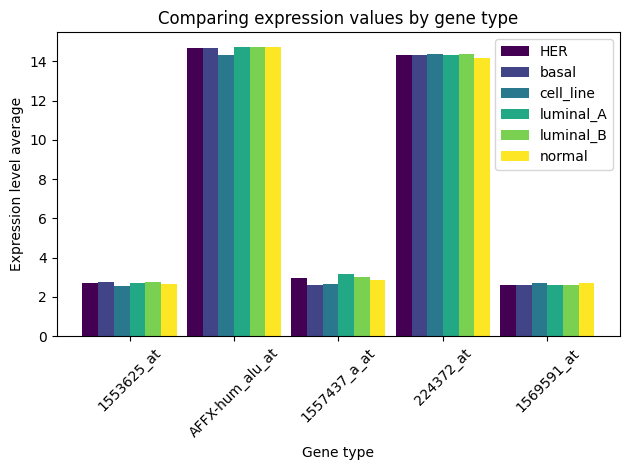

In [233]:

def viz_grouped_bars(data_dict, group_labels, x_labels):
    num_groups = len(data_dict)
    num_bars = len(data_dict[group_labels[0]])
    bar_width = 0.15
    index = np.arange(num_bars)  # Index for the x-axis positions

    # Set up the colors for the bars
    colors = plt.cm.viridis(np.linspace(0, 1, num_groups))

    # Create subplots to display multiple groups of bars
    fig, ax = plt.subplots()

    for i, label in enumerate(group_labels):
        values = data_dict[label]
        bar_positions = index + (i - (num_groups - 1) / 2) * bar_width
        ax.bar(bar_positions, values, bar_width, label=label, color=colors[i])

    # Labeling and formatting
    ax.set_xlabel("Gene type")
    ax.set_ylabel("Expression level average")
    ax.set_title("Comparing expression values by gene type")
    ax.set_xticks(index)
    ax.set_xticklabels(x_labels, rotation=45)  # Set x-axis labels as gene types
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
group_labels = ['HER', 'basal', 'cell_line', 'luminal_A', 'luminal_B', 'normal']
gene_labels = ['1553625_at', 'AFFX-hum_alu_at', '1557437_a_at', '224372_at', '1569591_at']


data_dict = {
    'HER': grouped[grouped['type'] == 'HER'][gene_labels].values.flatten(),
    'basal': grouped[grouped['type'] == 'basal'][gene_labels].values.flatten(),
    'cell_line': grouped[grouped['type'] == 'cell_line'][gene_labels].values.flatten(),
    'luminal_A': grouped[grouped['type'] == 'luminal_A'][gene_labels].values.flatten(),
    'luminal_B': grouped[grouped['type'] == 'luminal_B'][gene_labels].values.flatten(),
    'normal': grouped[grouped['type'] == 'normal'][gene_labels].values.flatten()
}

viz_grouped_bars(data_dict, group_labels, gene_labels)


As we can see, there does not appear to be a significant difference in expression levels by cancer type for all of our highest and lowest expressed genes. What might matter most is that the 'normal' samples (no cancer) follows this pattern of expression too. So, these four genes likely don't have anything to do with cancer supression or proliferation. If they did, we would see either a much lower or much higher level of expression in the 'normal' samples. This is why it is important to have a control group to provide a baseline for comparison.

Maybe a better way to see which genes are signficant in cancer supression or proliferation is to see which genes are the most different from "normal".

In [ ]:
def furthest_from_normal():